<a href="https://colab.research.google.com/github/Aswasthama/Aswasthama/blob/main/TEAM_Copy_of_Hotel_Booking_Analysis_Capstone_Project_individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Connecting to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Uploading Hotel Bookings csv dataset from drive**

In [ ]:
hotel_data = pd.read_csv('/content/drive/MyDrive/almabetter capstone/EDA capstone project/Hotel Bookings (1).csv')

**Checking top ten rows from Hotel Bookings csv dataset**.

In [ ]:
hotel_data.head(10) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


**Checking last ten rows from Hotel Bookings csv dataset**.

In [ ]:
hotel_data.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Data Exploration**

**Gathering the information from Hotel Bookings csv**.

In [ ]:
hotel_data.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Checking count of rows and columns**.

In [ ]:
hotel_data.shape  

(119390, 32)

**Checking how many number of unique values are in each columns**.

In [ ]:
hotel_data.nunique()   #checking how many unique values have in all columns

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

**checking unique values  from one column**.

In [ ]:
hotel_data['hotel'].unique()   # checking unic values names in a single column

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

**Data Cleaning**

**we are finding the null values from Hotel Bookings csv dataset**.

In [ ]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

**Droping the column on Hotel Bookings csv dataset because it has a more than 70 percentage of null values**.

In [ ]:
hotel_data.drop('company', axis=1, inplace=True)  

**Replacing the null values**

In [ ]:
hotel_data['children'].fillna('0',inplace=True)       # replacing na values into '0' in a children column
hotel_data['agent'].fillna('0',inplace=True)          # replacing na values into '0' in a agent column
hotel_data['country'].fillna('others', inplace=True)  # replacing null values into 'others' in a country column

In [ ]:
hotel_data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**checking for duplicate values with help of boolean type**.

---



In [ ]:
hotel_data.duplicated()     # checking for duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

**checking for duplicate values with help of visualization**.

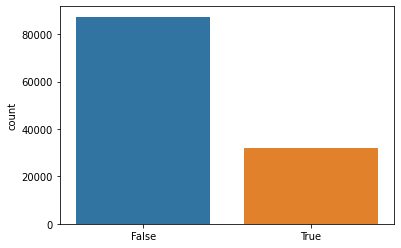

In [ ]:
sns.countplot(x = hotel_data.duplicated())   #checking duplicates with help of vizualisation

**Relationship analysis**

**Checking correlation between the columns**.

In [ ]:
correlation = hotel_data.corr()   # correlation matrix
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.030131,-0.006145,-0.087239,-0.097245,-0.146426,-0.008943,1.000000,0.082293,0.418056,0.012092,-0.022235,-0.134314,0.077090,0.013050


**Correlation visualization by heatmap**.

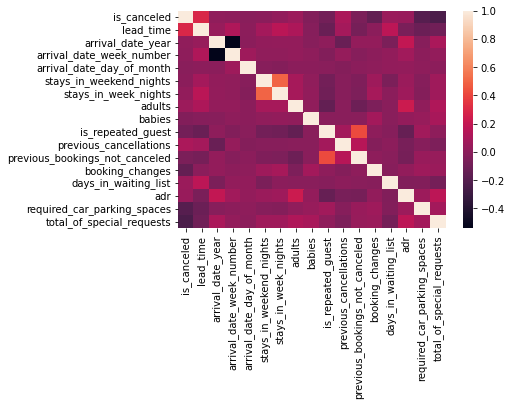

In [ ]:
heatmap = sns.heatmap(correlation)  # correlatoin vizualizaton by heatmap

**Checking the relationship between all columns with help of pair plot**.

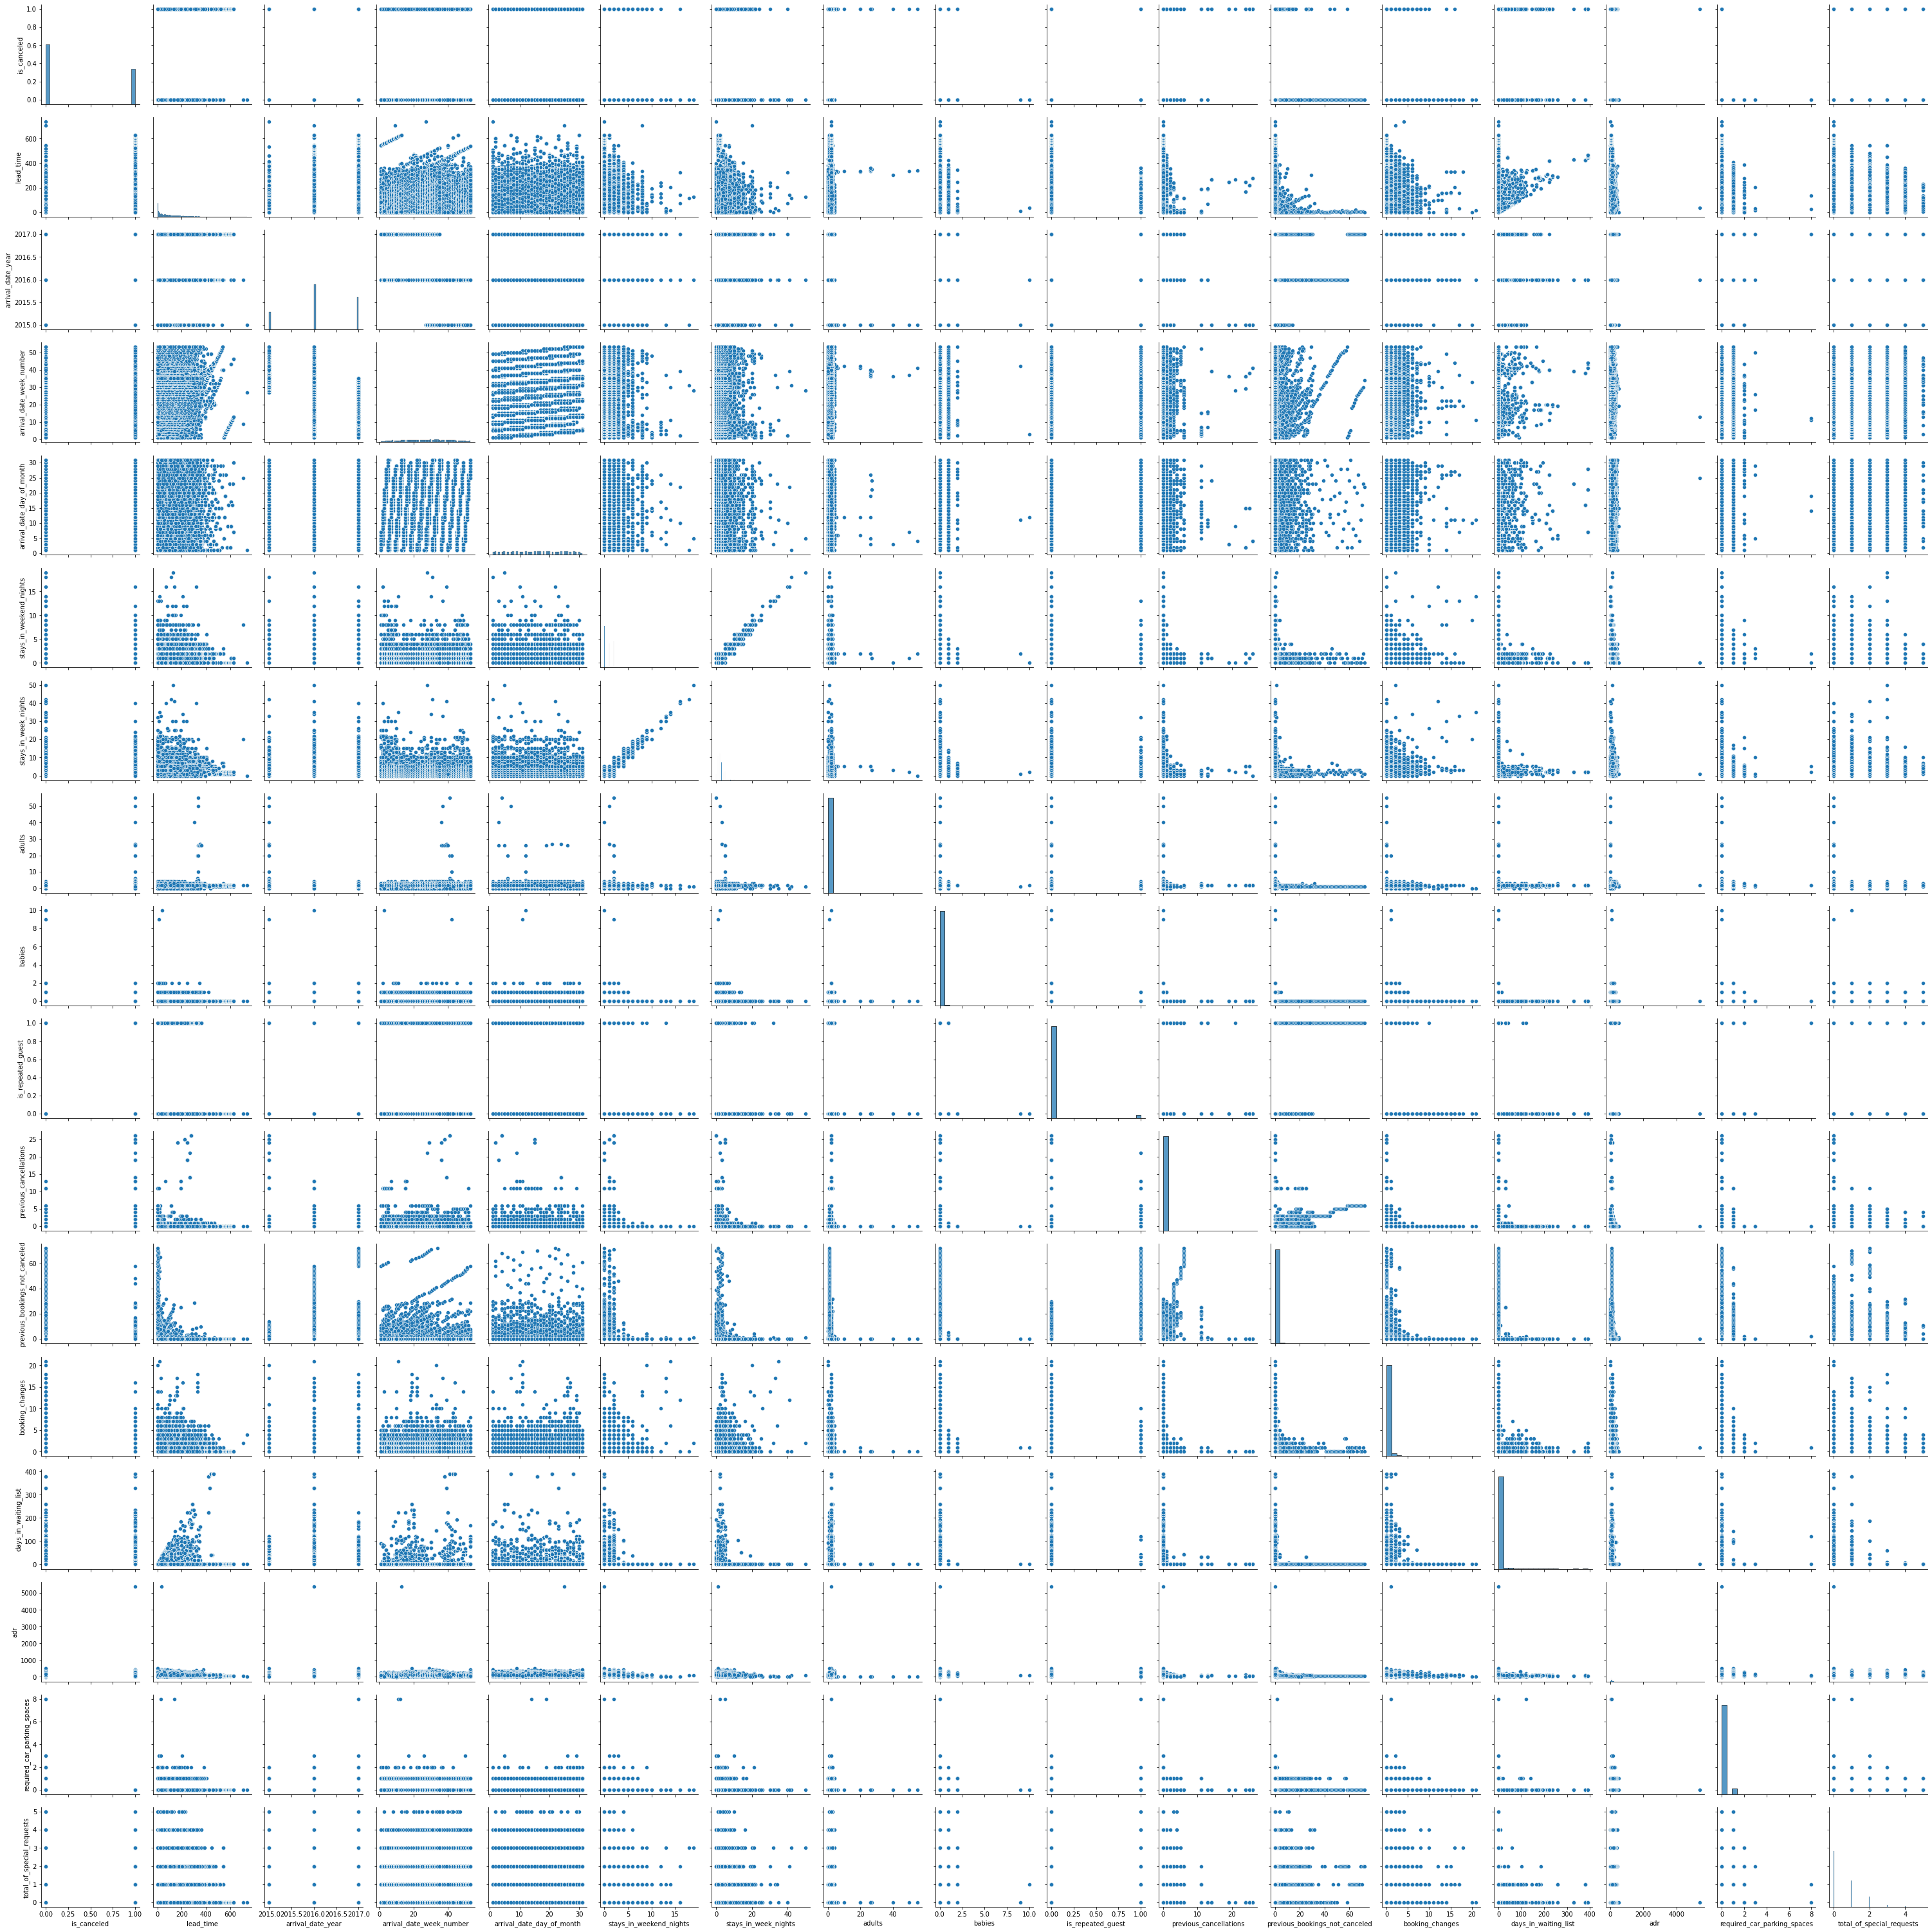

In [ ]:
sns.pairplot(hotel_data) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


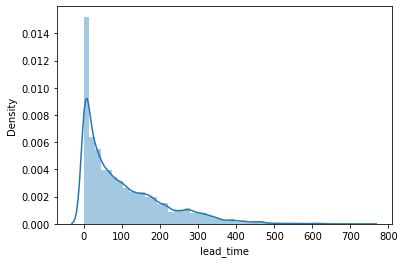

In [ ]:
sns.distplot(hotel_data['lead_time'])

**Checking outliear with help of box plot**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


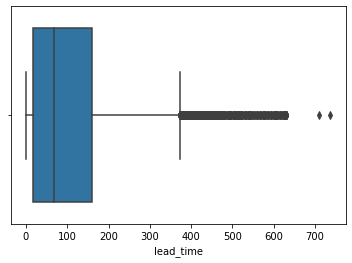

In [ ]:
sns.boxplot(hotel_data.lead_time) 


**1.Which hotel is most prefered by customers?**

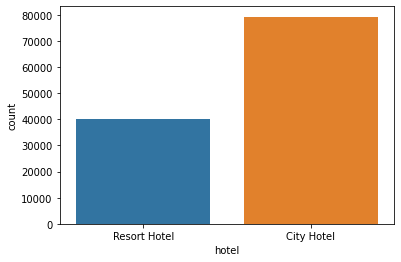

In [ ]:
sns.countplot(x='hotel',data=hotel_data)

**ANS** :
City hotel is more prefered by customers because city hotel has maximum no. of bookings.

**2.Which month visitors visit highly?**

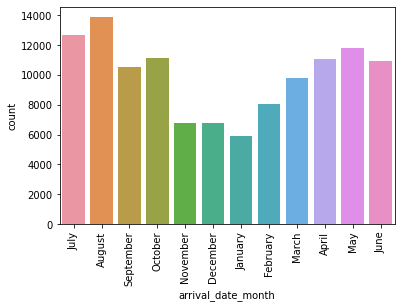

In [ ]:
sns.countplot(x='arrival_date_month', data=hotel_data)
plt.xticks(rotation=90)
plt.show()

**ANS** : August is one of the month got highest no.of visitors 

**3.Which type of room highly booked and prefered by customers?**

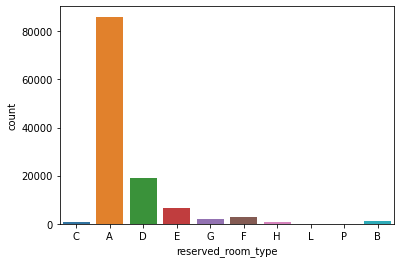

In [ ]:
sns.countplot(x=hotel_data['reserved_room_type'], data=hotel_data)

**ANS** : Code 'A' room are most prefered by customers because code 'A' room is highly booked by customers.

**4.Which year got a best sales?**

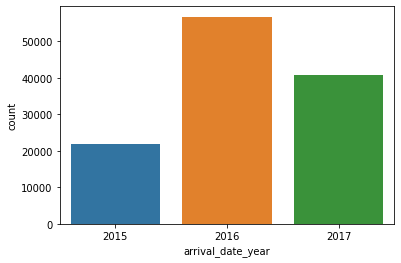

In [ ]:
sns.countplot(x='arrival_date_year',data=hotel_data)

**ANS** : In 3 years of data we got 2016 year of sales is higher than 2015 and 2017.

**5.Which hotel mostly cancelled by the customers?**

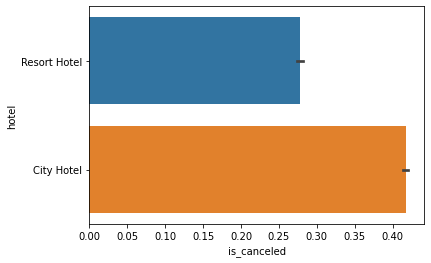

In [ ]:
sns.barplot(x=hotel_data['is_canceled'],y=hotel_data['hotel'])
plt.show()

**ANS** : After booking city hotel is mostly cancelled by customers.

**6.Which type of customers highly visited on both hotels?**

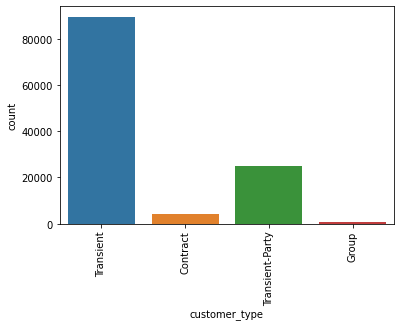

In [ ]:
sns.countplot(x='customer_type', data=hotel_data)
plt.xticks(rotation=90)
plt.show()

**ANS** : Transient type of customer is highly visite on both hotels. 

**7.What is the percentage of repeated guest?**

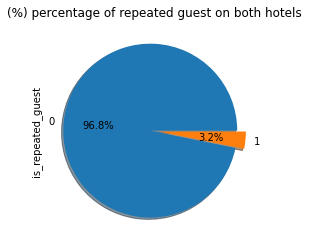

In [ ]:
hotel_data['is_repeated_guest'].value_counts().plot.pie(explode=[0.05,0.05], 
                                     autopct='%2.1f%%', 
                                     shadow=True)
plt.title('(%) percentage of repeated guest on both hotels')
plt.show()

**ANS** : 3.2% percentage of customers are repeated guest.

**8.What is the percentage distribution of deposit type?**

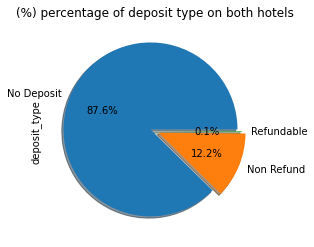

In [ ]:
hotel_data['deposit_type'].value_counts().plot.pie(explode=[0.05,0.05,0.05], 
                                     autopct='%2.1f%%', 
                                     shadow=True)
plt.title('(%) percentage of deposit type on both hotels')
plt.show()

**ANS** : 87.6% percentage is deposite type on both hotels.

**Conclusion** :

We cleaned and processed the provided data and then we conducted the exploratory data analysis to gain information from the data to answer the following questions.

1)Most prefered hotel by customers

2)Busiest month

3)Type of room highly booked by customers

4)which year got best sales

5)hotel mostly cancelled by customers

6)Type of customers who has most number of visits

7)Percentage of repeated guests

8)Percentage distribution of deposit type.



WE LEARNED THAT


1)City hotel is mostly prefered by customers

2)August has highest numbers of visitors 

3) Code"A" room is highly prefered by customers

4)In 2016 sales is higher than 2015 and 2017

5)City hotel is cancelled most of the times by customers

6)Transient type of customers visited most of the times on both hotels

7)3.2% of customers are repeated guests

8)87.6% is the deposit type on both hotel